In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import pandas as pd
import os

# --- 1. Load the cleaned dataset ---
file_path = '/Users/maribelgutierrezramirez/Desktop/proyecto5/equipo5_proyecto5/data/clean_data.csv'

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("File loaded successfully!")
    print(df.head())
else:
    print(f"Error: The file was not found at this path: {file_path}")


File loaded successfully!
       country  year      status  life_expectancy  adult_mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   infant_deaths  alcohol  percentage_expenditure  hepatitis_b  measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   polio  total_expenditure  diphtheria  hiv/aids         gdp  populatio

In [3]:
# Crea una copia explícita del DataFrame para el año 2015
df_2015 = df[df['year'] == 2015].copy()

# Ahora puedes modificar df_2015 sin recibir el aviso
df_2015.drop('total_expenditure', axis=1, inplace=True)

In [4]:
# Selecciona solo las columnas numéricas para crear numerical_df_clean
numerical_df_clean = df.select_dtypes(include=['number'])

print(numerical_df_clean.head())

   year  life_expectancy  adult_mortality  infant_deaths  alcohol  \
0  2015             65.0            263.0             62     0.01   
1  2014             59.9            271.0             64     0.01   
2  2013             59.9            268.0             66     0.01   
3  2012             59.5            272.0             69     0.01   
4  2011             59.2            275.0             71     0.01   

   percentage_expenditure  hepatitis_b  measles   bmi  under_five_deaths  \
0               71.279624         65.0     1154  19.1                 83   
1               73.523582         62.0      492  18.6                 86   
2               73.219243         64.0      430  18.1                 89   
3               78.184215         67.0     2787  17.6                 93   
4                7.097109         68.0     3013  17.2                 97   

   polio  total_expenditure  diphtheria  hiv/aids         gdp  population  \
0    6.0               8.16        65.0       0.1  

In [10]:
# Crea una copia explícita del DataFrame para el año 2015
df_2015 = df[df['year'] == 2015].copy()

# Ahora puedes modificar df_2015 sin recibir el aviso
df_2015.drop('total_expenditure', axis=1, inplace=True)

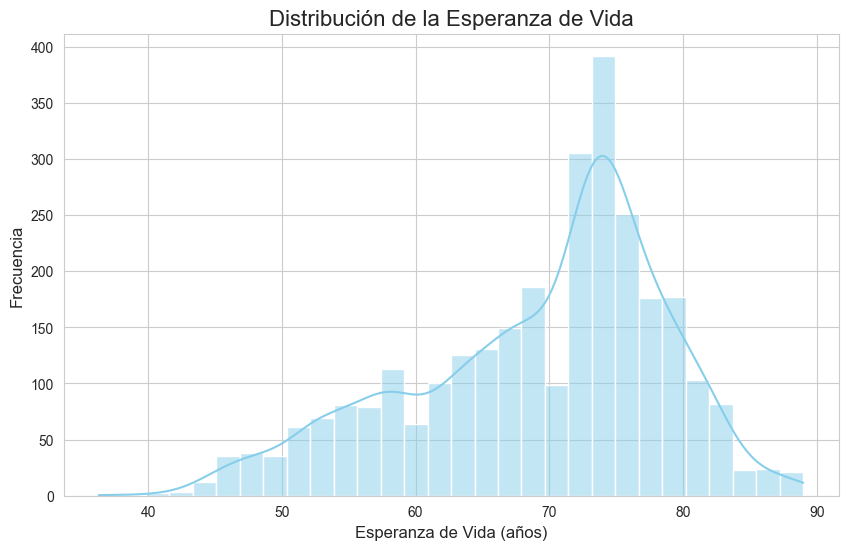

In [11]:
# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Crear el histograma de 'life_expectancy'
plt.figure(figsize=(10, 6))
sns.histplot(df_life['life_expectancy'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de la Esperanza de Vida', fontsize=16)
plt.xlabel('Esperanza de Vida (años)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

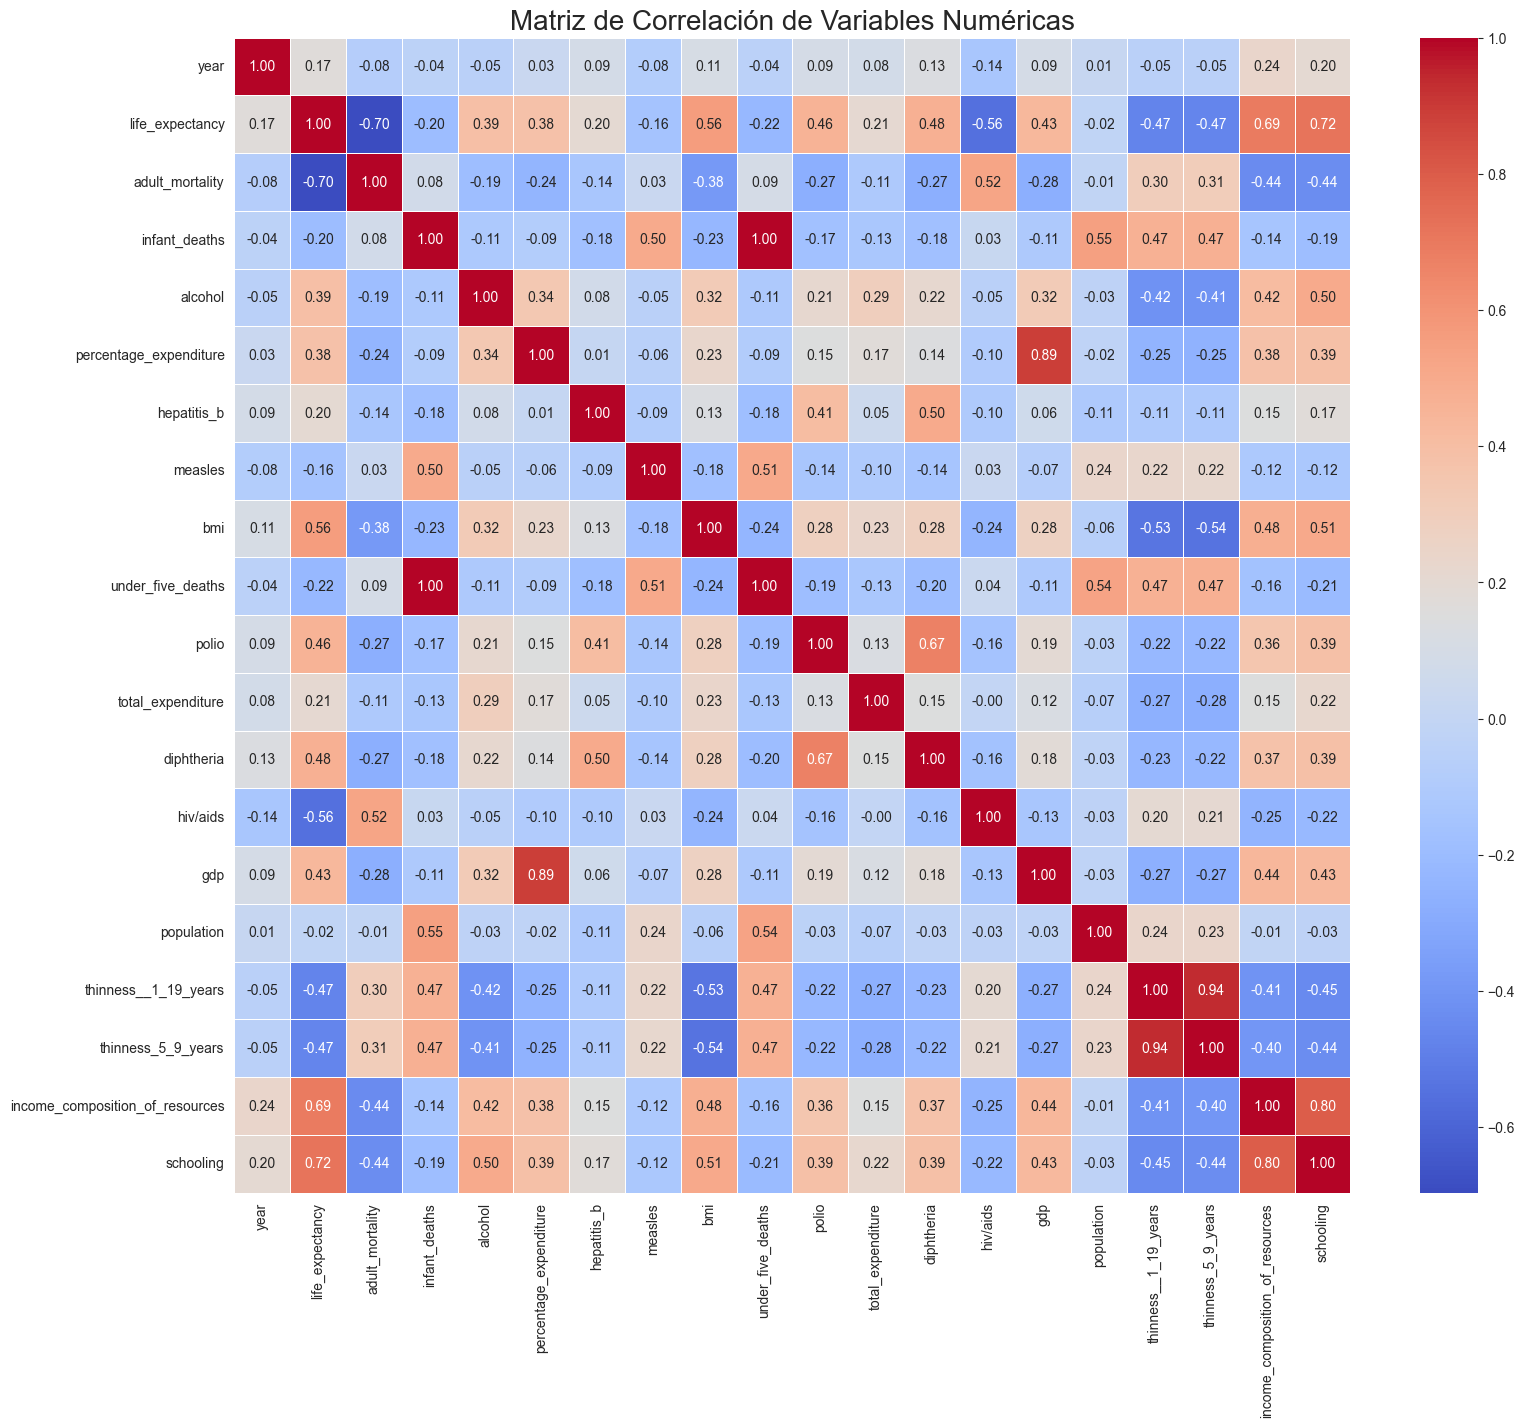

In [12]:
# Calcular la matriz de correlación
correlation_matrix = numerical_df_clean.corr()

# Crear el heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=20)
plt.show()

In [13]:
# Crea una copia del DataFrame principal para el análisis de esperanza de vida
df_life = df.copy()

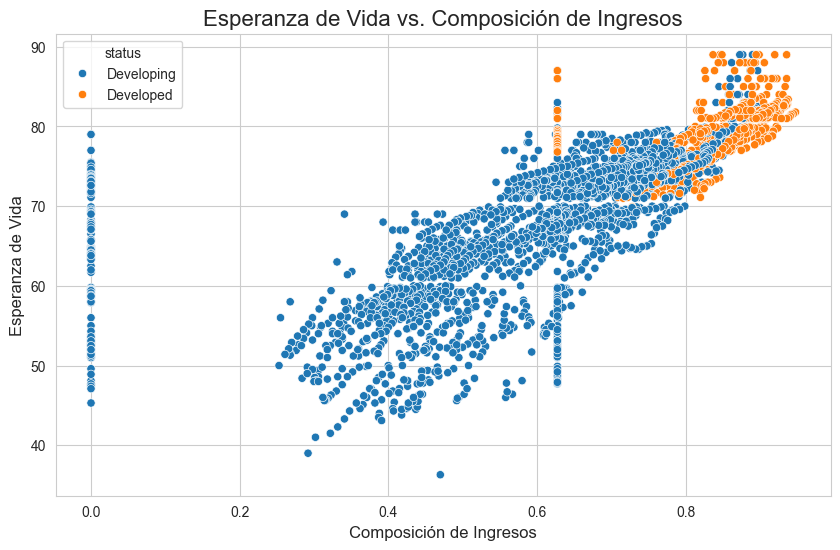

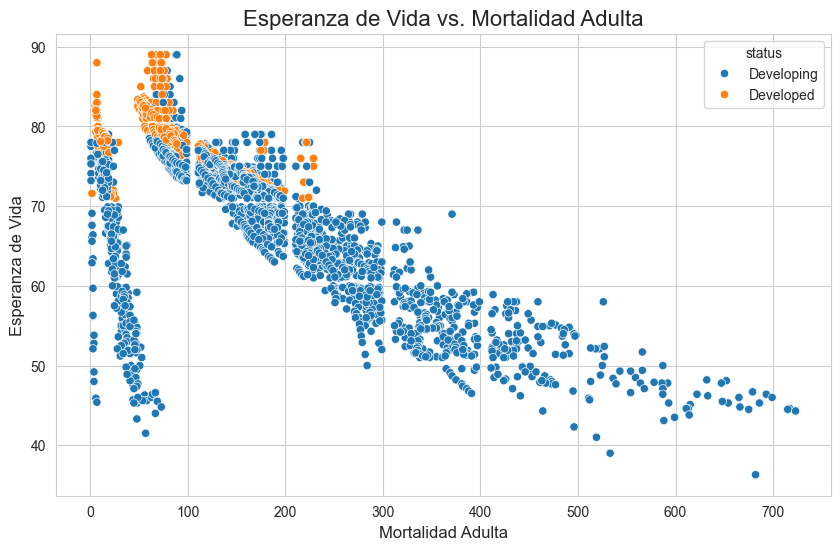

In [8]:
# Gráfico 1: Esperanza de Vida vs. Composición de Ingresos (alta correlación positiva)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_life, x='income_composition_of_resources', y='life_expectancy', hue='status')
plt.title('Esperanza de Vida vs. Composición de Ingresos', fontsize=16)
plt.xlabel('Composición de Ingresos', fontsize=12)
plt.ylabel('Esperanza de Vida', fontsize=12)
plt.show()

# Gráfico 2: Esperanza de Vida vs. Mortalidad Adulta (alta correlación negativa)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_life, x='adult_mortality', y='life_expectancy', hue='status')
plt.title('Esperanza de Vida vs. Mortalidad Adulta', fontsize=16)
plt.xlabel('Mortalidad Adulta', fontsize=12)
plt.ylabel('Esperanza de Vida', fontsize=12)
plt.show()

/var/folders/s_/d4b6mq3j6bd8xwqp4zh5c0540000gn/T/ipykernel_25216/217344297.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')


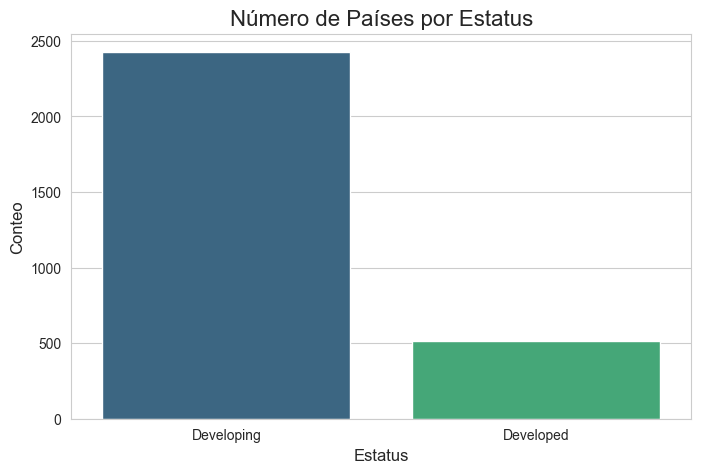

In [9]:
# Contar la frecuencia de los países por su 'status'
status_counts = df_life['status'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
plt.title('Número de Países por Estatus', fontsize=16)
plt.xlabel('Estatus', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.show()